In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Import and store the data in a data frame.

In [3]:
df = pd.read_table("http://www.stat.ufl.edu/~winner/data/airq402.dat", sep="\s+", header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [5]:
df.columns = ['city1','city2','Average_Fare',
                     'Distance','Average_weekly_passengers','market_leading_airline','Market_share','Average_fare','Low_price_airline','market_share','price']

In [6]:
df.head()

,city1,city2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,Market_share,Average_fare,Low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [9]:
df.shape

(1000, 11)

In [10]:
df.dtypes

city1                         object
city2                         object
Average_Fare                 float64
Distance                       int64
Average_weekly_passengers    float64
market_leading_airline        object
Market_share                 float64
Average_fare                 float64
Low_price_airline             object
market_share                 float64
price                        float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
city1                        1000 non-null object
city2                        1000 non-null object
Average_Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average_weekly_passengers    1000 non-null float64
market_leading_airline       1000 non-null object
Market_share                 1000 non-null float64
Average_fare                 1000 non-null float64
Low_price_airline            1000 non-null object
market_share                 1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Average_Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average_weekly_passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Market_share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average_fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market_share,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


2. Remove the outliers from the data

C:\Users\rloha\python\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


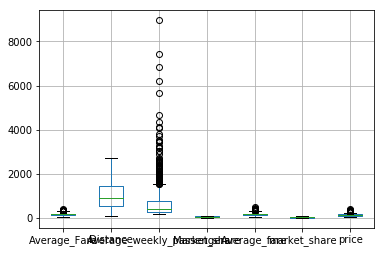

In [16]:
df.plot.box(grid='True')

In [21]:
df.head()
print('Shape of Dataset Before removing the outliers:',df.shape)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    sorted_col = df.sort_values([col])
    q1, q3= np.percentile(sorted_col[col],[25,75])
    print(q1,q3)
    iqr = q3 - q1
    lower_range = q1 -(1.5 * iqr) 
    upper_range = q3 +(1.5 * iqr) 
    df = df.loc[(df[col] > lower_range) & (df[col] < upper_range)]

print('After Removal of outliers:',df.shape)

Shape of Dataset Before removing the outliers: (877, 11)
126.18 193.66
563.0 1345.0
249.1025 655.3525
48.015 75.3725
124.96 198.085
12.515 54.5325
114.505 166.2275
After Removal of outliers: (818, 11)


3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

In [26]:
features = ['Distance', 'price','Average_weekly_passengers', 'Market_share', 'Average_fare','market_share']
x= df[features]
y = df['Average_Fare']
print(x)
print(y)

     Distance   price  Average_weekly_passengers  Market_share  Average_fare  \
0         528  111.03                     424.56         70.19        111.03   
1         860  118.94                     276.84         75.10        123.09   
2         852  167.12                     215.76         78.89        223.98   
3         288   68.86                     606.84         96.97         68.86   
4         723  145.42                     313.04         39.79        161.36   
5        1204  127.69                     199.02         40.68        137.97   
6        2237  148.59                     237.17         59.94        148.59   
7        2467  174.00                     191.95         17.89        205.06   
8        1073  127.69                     550.54         76.84        127.69   
9        1130  124.78                     202.93         35.40        132.91   
10       1269  200.93                     198.80         68.39        226.79   
11       1670  161.39                   

4. Drop the independent variables which has less than 0.1 correlation with the dependent variable

C:\Users\rloha\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


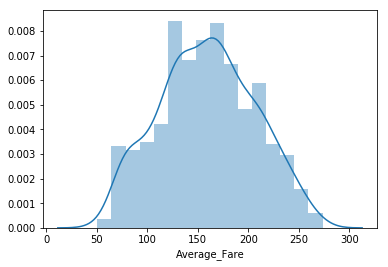

In [30]:
import seaborn as sns
sns.distplot(df['Average_Fare'])

In [31]:
df.corr()

,Average_Fare,Distance,Average_weekly_passengers,Market_share,Average_fare,market_share,price
Average_Fare,1.000000,0.506324,-0.194664,-0.195927,0.980388,-0.496076,0.846115
Distance,0.506324,1.000000,-0.085394,-0.531383,0.477411,-0.357371,0.526544
Average_weekly_passengers,-0.194664,-0.085394,1.000000,0.039849,-0.171886,0.097142,-0.184840
Market_share,-0.195927,-0.531383,0.039849,1.000000,-0.184989,0.271626,-0.304425
Average_fare,0.980388,0.477411,-0.171886,-0.184989,1.000000,-0.523195,0.806506
market_share,-0.496076,-0.357371,0.097142,0.271626,-0.523195,1.000000,-0.258543
price,0.846115,0.526544,-0.184840,-0.304425,0.806506,-0.258543,1.000000


In [35]:
corr_matrix=df.corr().abs()
corr_matrix["Average_fare"].sort_values(ascending=False)

Average_fare                 1.000000
Average_Fare                 0.980388
price                        0.806506
market_share                 0.523195
Distance                     0.477411
Market_share                 0.184989
Average_weekly_passengers    0.171886
Name: Average_fare, dtype: float64

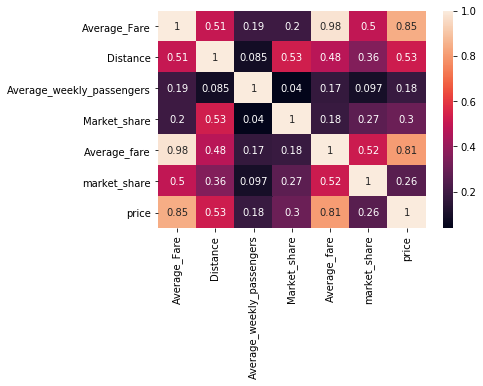

In [36]:
sns.heatmap(corr_matrix, annot=True)

Here, I checked for absolute correlation because negative correlation is also important for prediction.
And as we can see none of the variable has correlation less than 0.1, I am not removing any columns here.

5. Create scatter Plot of Independent Variable vs Dependent Variable.

C:\Users\rloha\python\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rloha\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


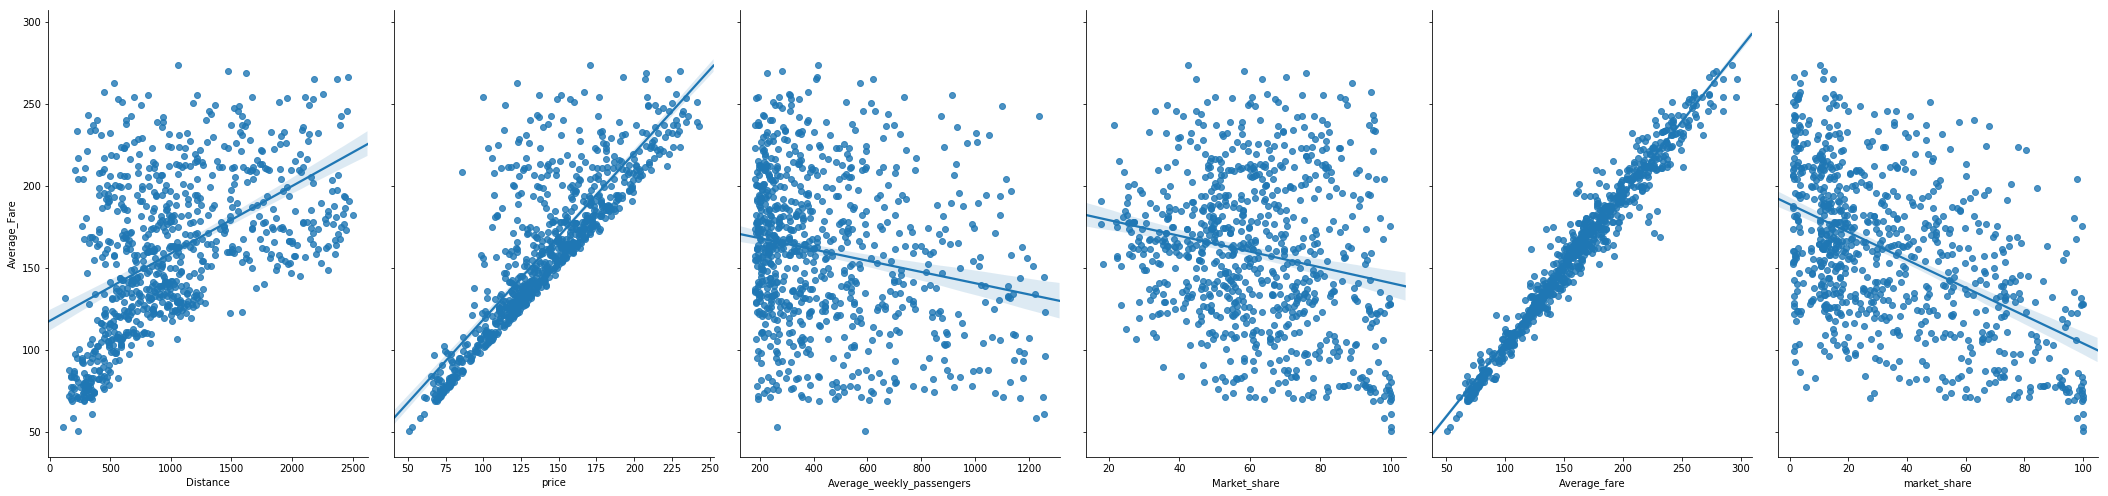

In [39]:
sns.pairplot(df,x_vars=['Distance', 'price','Average_weekly_passengers', 'Market_share', 'Average_fare','market_share'],y_vars=['Average_Fare'],kind='reg',size=7,aspect=0.7)


6. Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [44]:
df1=df.drop(['city1','city2','market_leading_airline','Low_price_airline'], axis=1)
df1.head()

,Average_Fare,Distance,Average_weekly_passengers,Market_share,Average_fare,market_share,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [45]:
X = df1[['Distance','Average_weekly_passengers','Market_share','Average_fare','market_share','price']]
Y = df1[['Average_Fare']]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)

In [49]:
from sklearn import linear_model

regrr = linear_model.LinearRegression()
regrr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

7. Print the coefficients & intercepts of the linear regression model

In [50]:
print("coefficients are: ",regrr.coef_)

print("Intercept is",regrr.intercept_)

coeff = pd.DataFrame( data = regrr.coef_.transpose(), index = X.columns, columns = ['Coefficient'])
coeff

coefficients are:  [[ 0.00234717 -0.00297468  0.07852856  0.77233042 -0.02221821  0.18454275]]
Intercept is [3.67342555]


,Coefficient
Distance,0.002347
Average_weekly_passengers,-0.002975
Market_share,0.078529
Average_fare,0.772330
market_share,-0.022218
price,0.184543


8. Print the accuracy of the overall model

In [51]:
print(regrr.score(X_train, y_train))
print(regrr.score(X_test,y_test))

0.9749316439092307
0.9534408379984723
